1- clean the data:
- [ ] Clean all the row, no imputaing. if there’s a column with a lot of missing values just delete it.


2- applying Laplace noise:
- [ ] For the privacy budget in each run, the values become different so it is better to have a Seed, so no matter how we run the code the noise budget stays the same

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seed
np.random.seed(42)

- [ ] We have to apply the noise for these variables also: education.num, capital.gain, capital.loss and hours.per.week. And if we can apply it in “education” which is a categorical attribute it would be good. (check if there’s a way)

In [2]:
# Load your dataframe
df = pd.read_excel('adult_withoutnull.xlsx')
def add_laplace_noise(data, epsilon, sensitivity):
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

sensitivity_numerical = 1
epsilon_numerical = 0.1

numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week','age']
perturbed_columns = []
for column in numerical_columns:
    perturbed_column = f"{column}_perturbed"
    df[perturbed_column] = add_laplace_noise(df[column], epsilon_numerical, sensitivity_numerical)
    perturbed_columns.append(perturbed_column)

In [3]:
# Apply Laplace noise to 'education'
sensitivity_categorical = 1
epsilon_categorical = 0.1

education_counts = df['education'].value_counts()
noise = np.random.laplace(0, sensitivity_categorical / epsilon_categorical, size=len(education_counts))
noisy_counts = education_counts + noise
df['education_perturbed'] = df['education'].map(noisy_counts)
df['education_perturbed'] = df['education_perturbed'].clip(lower=0)

- [ ] The Age after applying the noise becomes negative values which is impossible. check in the original dataset what is the minimum and higher ages and we will put a range. It will be the same for the other attributes.

In [4]:
min_age, max_age = df['age'].min(), df['age'].max()
for column in numerical_columns:
    min_value, max_value = df[column].min(), df[column].max()
    df[column] = df[column].clip(lower=min_value, upper=max_value)

print("Perturbed Columns:")
print(df[perturbed_columns].head())

Perturbed Columns:
   education.num_perturbed  capital.gain_perturbed  capital.loss_perturbed  \
0                 6.110908               23.597805             4340.714072   
1                27.169743              -11.730759             3913.531182   
2                16.235985                1.586338             3903.299445   
3                11.197954               25.712148             3773.431505   
4                -5.646326               12.767022             3767.879860   

   hours.per.week_perturbed  age_perturbed  
0                 30.860828      90.482984  
1                 45.190548      60.452388  
2                 36.369939      28.983747  
3                 41.577717      70.219526  
4                 13.689278      49.739358  


3- Visualization:
- [ ] For the age and the other variables, we want binning the histogram. which means put a width for example for the age put 5 years between each group etc.

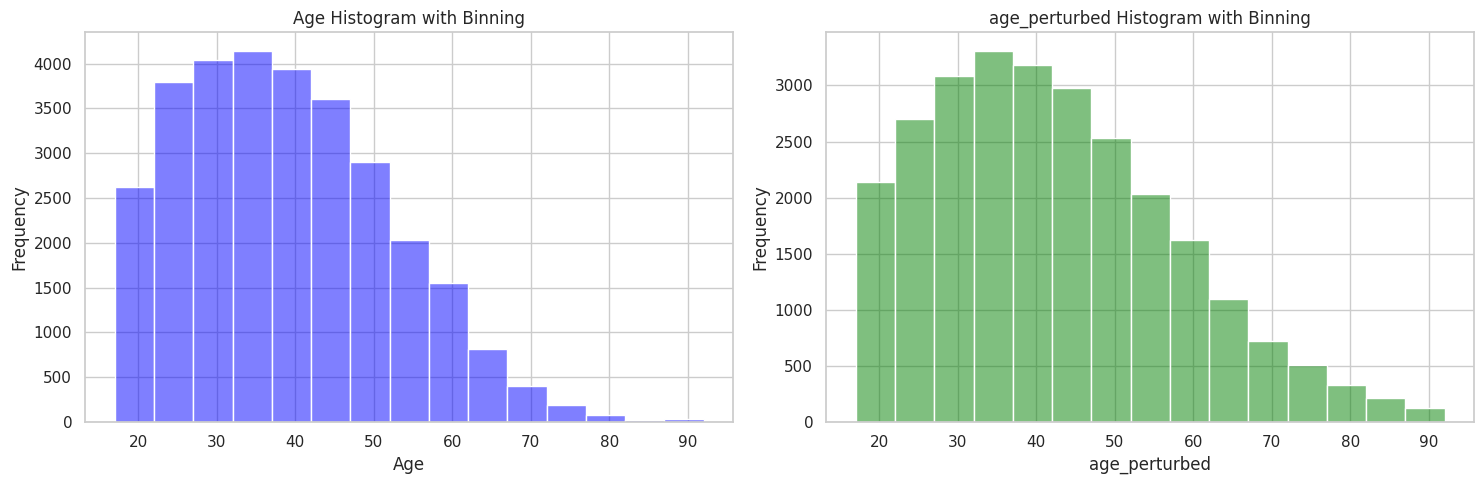

In [5]:
import seaborn as sns
sns.set(style="whitegrid")

bin_width = 5
bins = range(min(df['age']), max(df['age']) + bin_width, bin_width)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df, x='age', bins=bins, ax=axes[0], color='blue', alpha=0.5)
axes[0].set_title('Age Histogram with Binning')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

selected_column = 'age_perturbed'
sns.histplot(df, x=selected_column, bins=bins, ax=axes[1], color='green', alpha=0.5)
axes[1].set_title(f'{selected_column} Histogram with Binning')
axes[1].set_xlabel(selected_column)
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


- [ ] We want in one chart we put the value of the original and the perturbed bar chart side by side to better evaluate the utility of the visualization visually.

- capital.gain Plots

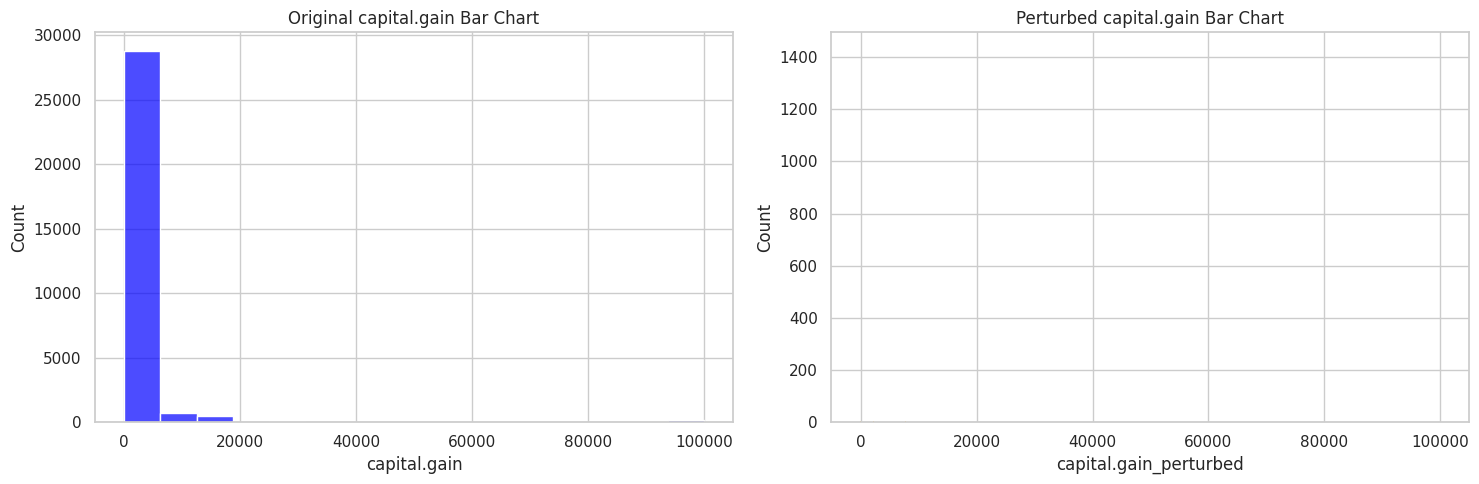

In [6]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'capital.gain'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'Perturbed {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- capital.loss Plots

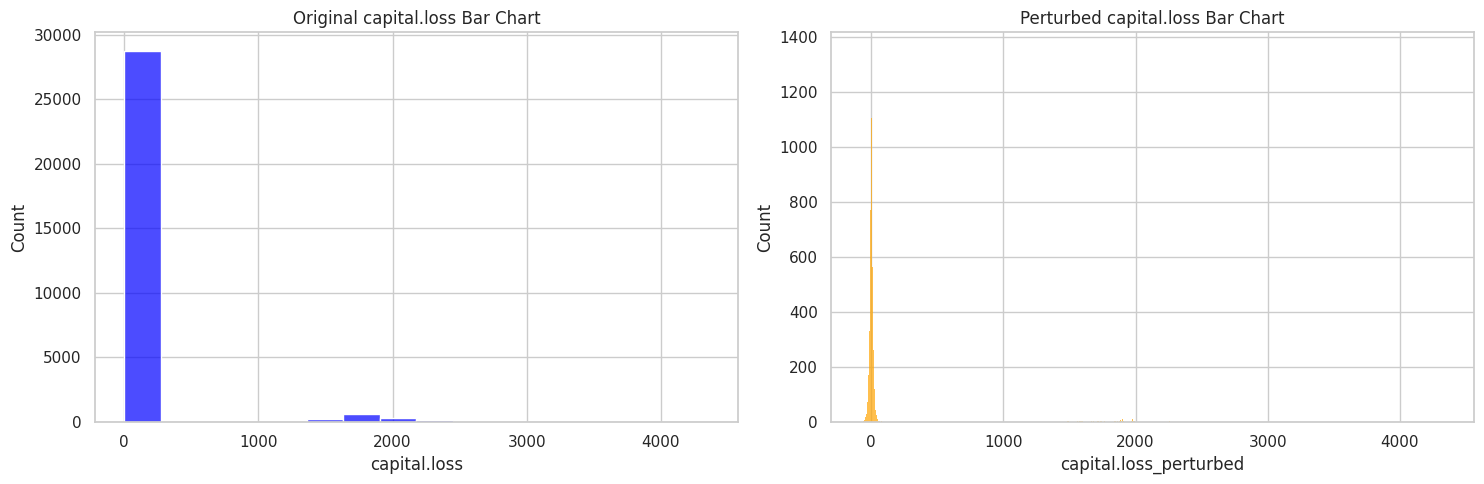

In [7]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'capital.loss'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'Perturbed {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- hours.per.week Plots

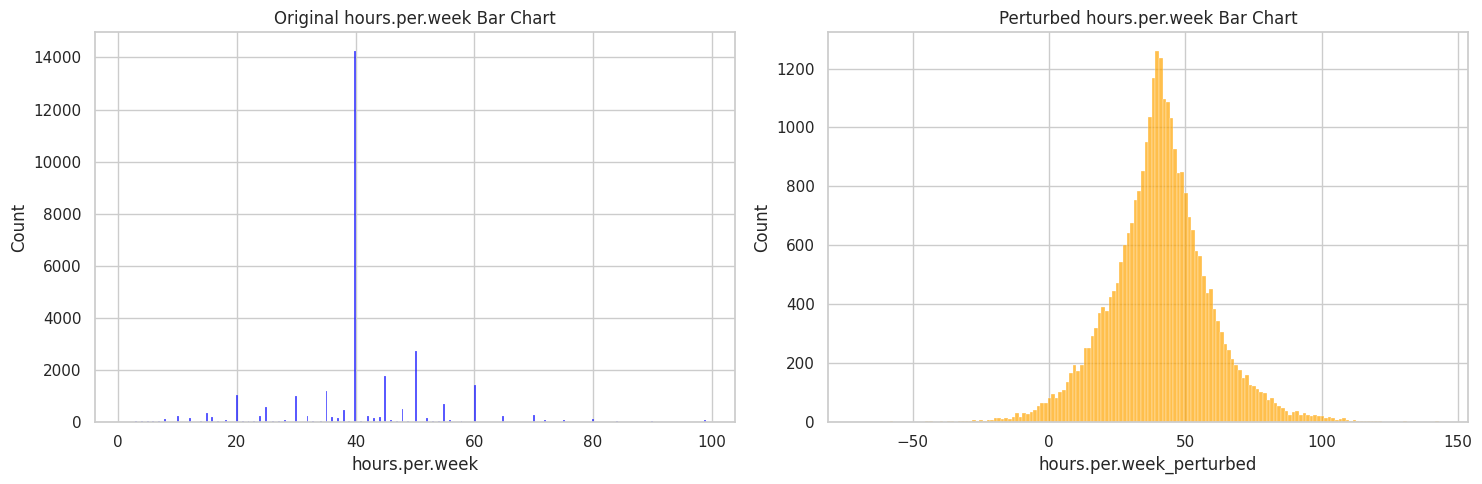

In [8]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'hours.per.week'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'Perturbed {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- age Plots

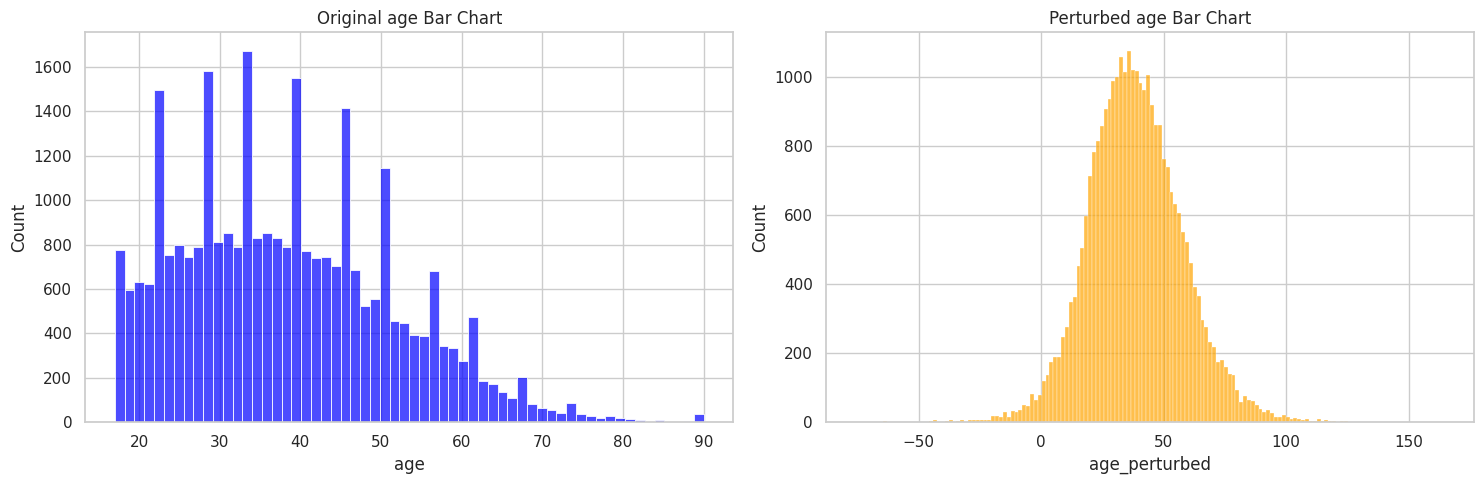

In [9]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'age'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'Perturbed {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- education.num Plots

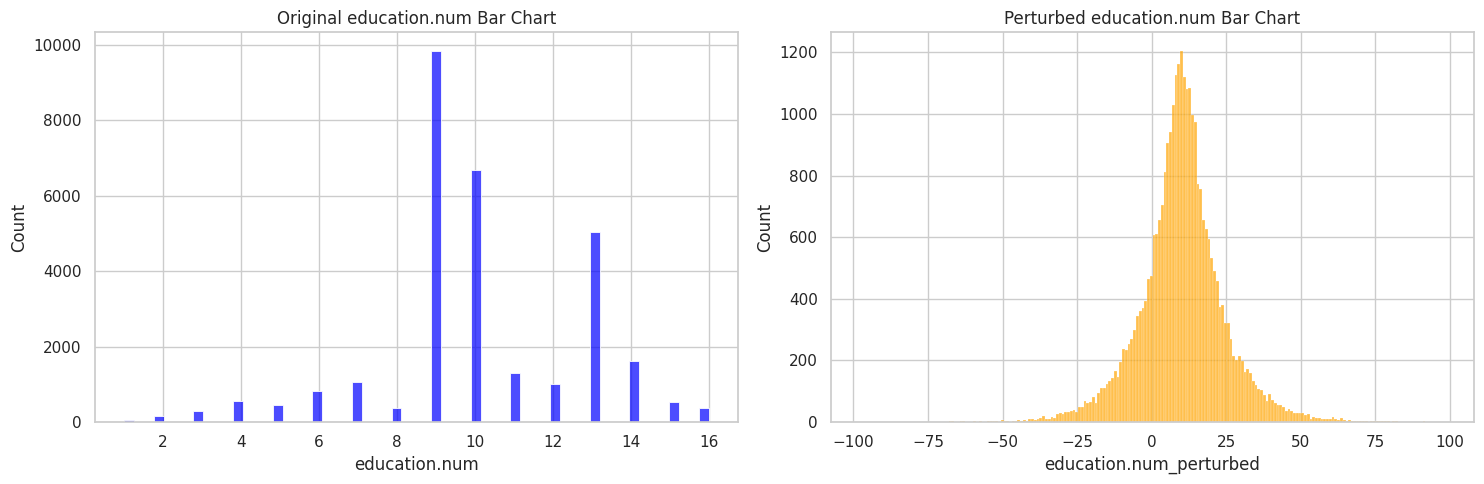

In [10]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'education.num'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'Perturbed {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- [ ] we want to add one chart that has the average income variable on the y-axis and  “education or education num” on the x-axis.

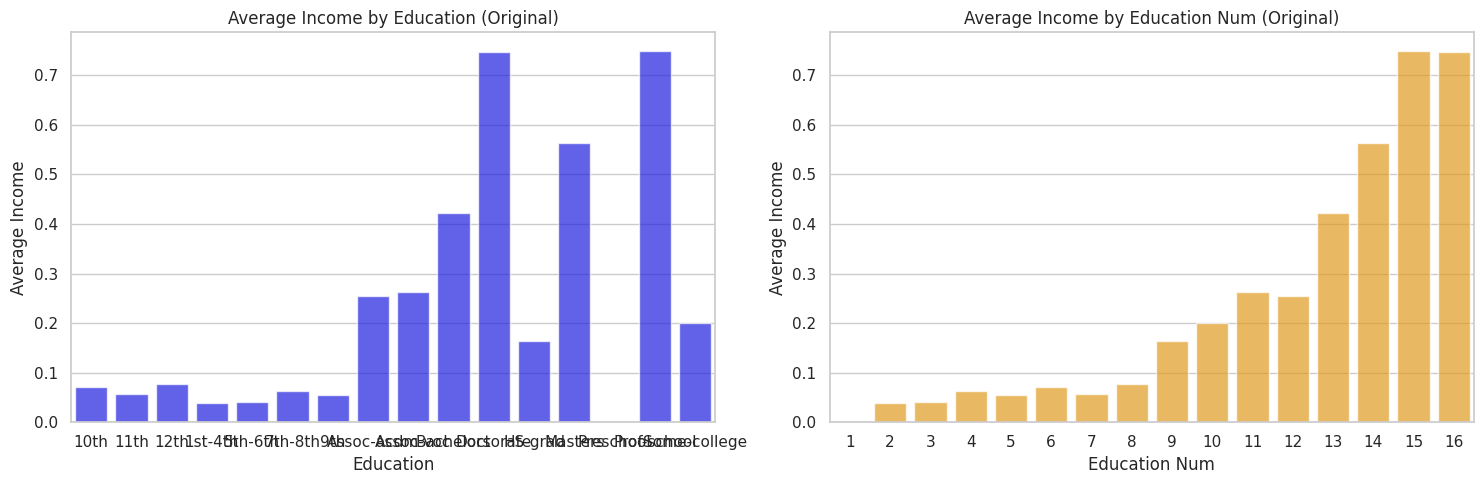

In [11]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

avg_income_education = df.groupby('education')['income'].mean().reset_index()
sns.barplot(data=avg_income_education, x='education', y='income', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Average Income by Education (Original)')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Average Income')

avg_income_education_num = df.groupby('education.num')['income'].mean().reset_index()
sns.barplot(data=avg_income_education_num, x='education.num', y='income', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title('Average Income by Education Num (Original)')
axes[1].set_xlabel('Education Num')
axes[1].set_ylabel('Average Income')

plt.tight_layout()
plt.show()
